# Experiments
link: https://docs.google.com/spreadsheets/d/1ATQJSiua4UExb08QPthAHpX9SjR8lj0hojvHwP6-V6Q/edit#gid=0


## 3.1.0) Separate rooms into train(train+valid) and test parts

In [3]:
# Train-Test split
import util
util.rooms_train_test_split("rooms_cleaned.txt", 400)

## 3.1.1) Build data.txt

In [7]:
# Build for Train & Valid
import util
util.build_dataset_train_valid(target_name='DEMO', \
                                pos_ind=0, feat_ind=1, base=0, method=0, \
                               ratio=5, threshold=-1)

(8228, 1912)

In [3]:
# Build for Test
import util
patterns = [(x,y) for x in range(1,8) for y in range(0,3)]
for pattern in patterns:
    count = util.build_dataset_test(pattern=pattern, \
                                    pos_ind=0, feat_ind=1, base=0, method=0, \
                                    ratio=5, threshold=-1)
    print('experiment {} with count {}'.format(pattern, count))

experiment (1, 0) with count 480
experiment (1, 1) with count 480


/home/igor/Desktop/tao/tisl/tisl_localization_22s/grakit.py:73: RuntimeWarning: invalid value encountered in double_scalars
  average_dis = np.sum(dis_matrix) / (num_v*(num_v - 1))


experiment (1, 2) with count 475
experiment (2, 0) with count 480
experiment (2, 1) with count 480
experiment (2, 2) with count 475
experiment (3, 0) with count 480
experiment (3, 1) with count 480
experiment (3, 2) with count 475
experiment (4, 0) with count 480
experiment (4, 1) with count 480
experiment (4, 2) with count 475
experiment (5, 0) with count 480
experiment (5, 1) with count 480
experiment (5, 2) with count 475
experiment (6, 0) with count 480
experiment (6, 1) with count 480
experiment (6, 2) with count 475
experiment (7, 0) with count 480
experiment (7, 1) with count 480
experiment (7, 2) with count 475


### Note: There are 10165 graphs in the input file, the first 8250 are for training, the last 1915 are for validation

In [4]:
!head -3 pytorch_DGCNN-master/data/DEMO/DEMO.txt
# !head -8 pytorch_DGCNN-master/data/DEMO_TEST/DEMO_TEST.txt

10140
45 0
1 44 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


In [5]:
!head -3 experiment_inputs/2_2.txt
# !head -8 pytorch_DGCNN-master/data/DEMO_TEST/DEMO_TEST.txt

475
2 0
1 1 1 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0


## 3.1.2) Visulize data.txt

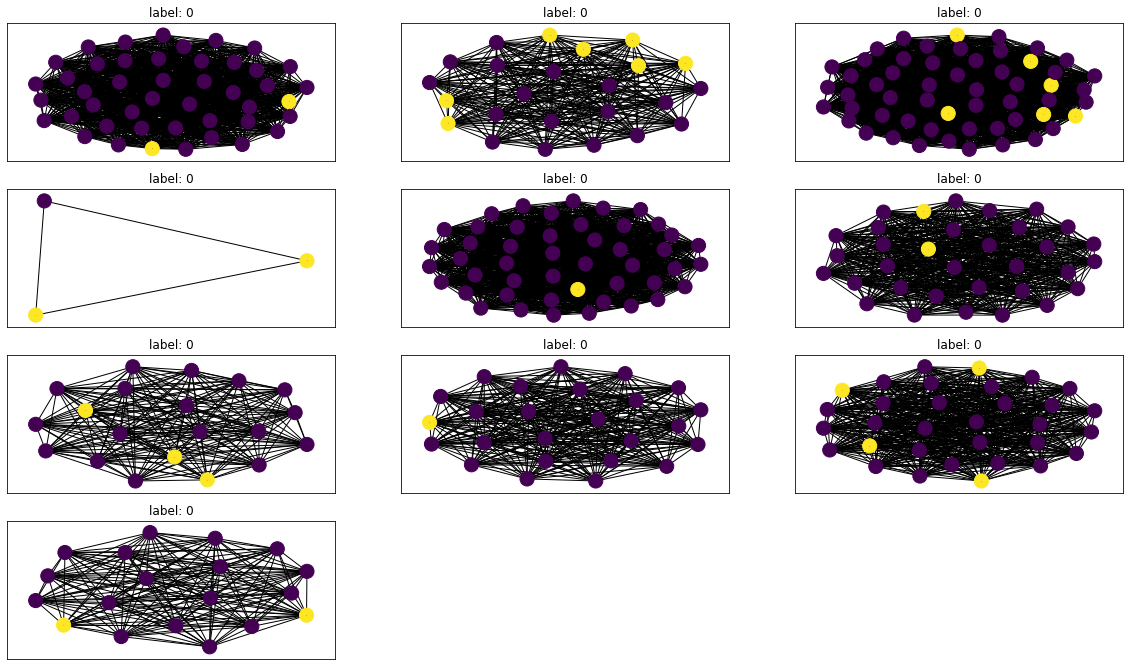

In [6]:
import util
util.visualize_graph(data="pytorch_DGCNN-master/data/DEMO/DEMO.txt", node_size=200, nth=1000, \
                     num_columns=3, figsize=(20,30), is_color_graph=True)

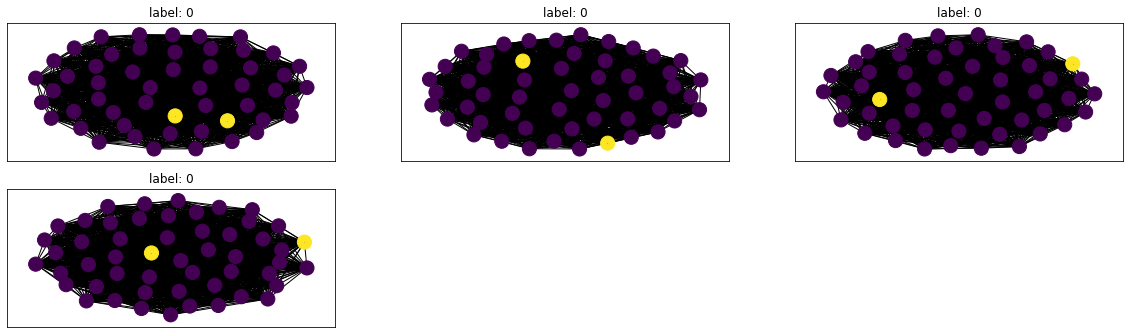

In [9]:
import util
util.visualize_graph(data="experiment_inputs/1_0.txt", node_size=200, nth=100, \
                     num_columns=3, figsize=(20,30), is_color_graph=True)

## 3.2) Build up train/valid split
### Note: we use: 
    folder 3 for train/valid split

In [10]:
# for Train & Valid
import util
util.build_train_valid_split_fold(3, 'DEMO', 8228, 1912)
!head -10 ./pytorch_DGCNN-master/data/DEMO/10fold_idx/test_idx-3.txt

8228
8229
8230
8231
8232
8233
8234
8235
8236
8237


## 3.3) Run DGCNN
    To actually run DGCNN, use VS code for better dynamic visibility
    To record the tuned hyper-parameters, use cells below
    To see the visualization of training process, open train_process.png

In [11]:
# Un-tuned: latent-dim, sortpooling_k, max_lv
# for Train & Valid
%cd pytorch_DGCNN-master
!pwd
# With feature
!CUDA_VISIBLE_DEVICES=0 python main_test.py       \
-seed 1       \
-data DEMO       \
-fold 3       \
-learning_rate 0.005      \
-num_epochs 50     \
-hidden 256       \
-latent_dim 64-32-32-16-8       \
-sortpooling_k 1       \
-out_dim 32       \
-batch_size 256       \
-gm DGCNN       \
-mode gpu       \
-dropout True       \
-test_number 1912 \
-extract_features True \
-max_lv 5 \
-visualize_process True

/home/igor/Desktop/tao/tisl/tisl_localization_22s/pytorch_DGCNN-master
/home/igor/Desktop/tao/tisl/tisl_localization_22s/pytorch_DGCNN-master
====== begin of gnn configuration ======
| msg_average = 0
======   end of gnn configuration ======
Namespace(batch_size=256, conv1d_activation='ReLU', data='DEMO', dropout=True, edge_feat_dim=0, extract_features=True, feat_dim=0, fold=3, gm='DGCNN', hidden=256, latent_dim=[64, 32, 32, 16, 8], learning_rate=0.005, max_lv=5, mode='gpu', num_class=0, num_epochs=50, out_dim=32, printAUC=False, seed=1, sortpooling_k=1.0, test_number=1912, visualize_process=True)
loading data
# classes: 397
# maximum node tag: 2
# train: 8228, # test: 1912
k used in SortPooling is: 91
Initializing DGCNN
loss: 5.74563 acc: 0.02734: 100%|████████████| 32/32 [00:02<00:00, 11.22batch/s]
average training of epoch 0: loss 5.88099 acc 0.00964 auc 0.00000
loss: 5.87395 acc: 0.04167: 100%|██████████████| 8/8 [00:00<00:00, 20.90batch/s]
average test of epoch 0: loss 6.01837 acc

loss: 2.05225 acc: 0.41016: 100%|████████████| 32/32 [00:02<00:00, 14.66batch/s]
average training of epoch 24: loss 2.01307 acc 0.41174 auc 0.00000
loss: 4.42270 acc: 0.22500: 100%|██████████████| 8/8 [00:00<00:00, 21.46batch/s]
average test of epoch 24: loss 4.58955 acc 0.19613 auc 0.00000
loss: 2.10033 acc: 0.40234: 100%|████████████| 32/32 [00:02<00:00, 14.51batch/s]
average training of epoch 25: loss 1.96460 acc 0.43079 auc 0.00000
loss: 4.96952 acc: 0.22500: 100%|██████████████| 8/8 [00:00<00:00, 23.21batch/s]
average test of epoch 25: loss 4.86122 acc 0.20659 auc 0.00000
loss: 2.10846 acc: 0.44531: 100%|████████████| 32/32 [00:02<00:00, 14.51batch/s]
average training of epoch 26: loss 1.86383 acc 0.45093 auc 0.00000
loss: 4.21898 acc: 0.27500: 100%|██████████████| 8/8 [00:00<00:00, 19.54batch/s]
average test of epoch 26: loss 4.57477 acc 0.23326 auc 0.00000
loss: 1.81357 acc: 0.44922: 100%|████████████| 32/32 [00:02<00:00, 14.28batch/s]
average training of epoch 27: loss 1.84918 

loading test data: 6_2.txt
loading test data: 3_1.txt
loading test data: 4_2.txt
loading test data: 5_2.txt
loading test data: 2_0.txt
loading test data: 4_0.txt
loading test data: 6_0.txt
loading test data: 5_1.txt
loading test data: 7_1.txt
loading test data: 5_0.txt
loading test data: 7_2.txt
loading test data: 1_2.txt
loading test data: 1_0.txt
loading test data: 4_1.txt
loading test data: 1_1.txt
loading test data: 6_1.txt


## 3.4) Get top-1 & top-5 scores

In [1]:
from top_n import get_top_n_score
import os
from os.path import join
test_set_list = os.listdir('experiment_sets')

for test_set in test_set_list:  
    top1_score_test1, top5_score_test1 = get_top_n_score(5, join('experiment_sets', test_set))
    print('Top-1 score for {}: {}'.format(test_set, top1_score_test1))
    print('Top-5 score for {}: {}'.format(test_set, top5_score_test1))

Top-1 score for 3_2.txt: 0.5494736842105263
Top-5 score for 3_2.txt: 0.72
Top-1 score for 2_1.txt: 0.16041666666666668
Top-5 score for 2_1.txt: 0.3729166666666667
Top-1 score for 3_0.txt: 0.46875
Top-5 score for 3_0.txt: 0.7270833333333333
Top-1 score for 2_2.txt: 0.37684210526315787
Top-5 score for 2_2.txt: 0.5663157894736842
Top-1 score for 7_0.txt: 0.65625
Top-5 score for 7_0.txt: 0.7895833333333333
Top-1 score for 6_2.txt: 0.7705263157894737
Top-5 score for 6_2.txt: 0.7747368421052632
Top-1 score for 3_1.txt: 0.2604166666666667
Top-5 score for 3_1.txt: 0.55
Top-1 score for 4_2.txt: 0.7010526315789474
Top-5 score for 4_2.txt: 0.8084210526315789
Top-1 score for 5_2.txt: 0.7368421052631579
Top-5 score for 5_2.txt: 0.8
Top-1 score for 2_0.txt: 0.2791666666666667
Top-5 score for 2_0.txt: 0.5604166666666667
Top-1 score for 4_0.txt: 0.5708333333333333
Top-5 score for 4_0.txt: 0.7770833333333333
Top-1 score for 6_0.txt: 0.61875
Top-5 score for 6_0.txt: 0.7979166666666667
Top-1 score for 5_

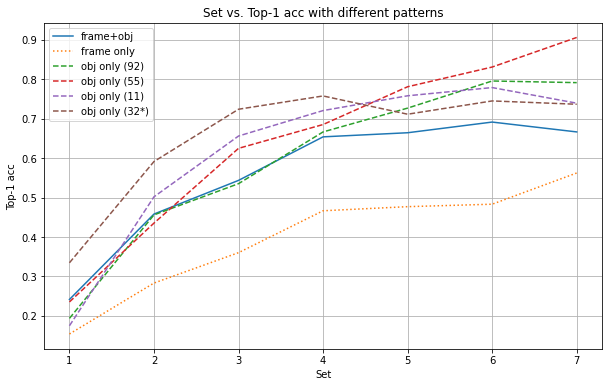

In [2]:
import matplotlib.pyplot as plt
import numpy as np
  
x = np.array([1, 2, 3, 4, 5, 6, 7])
y_0 = np.array([0.2416666667,0.4583333333,0.54375,0.6541666667,0.6645833333,0.6916666667,0.6666666667])
y_1 = np.array([0.1541666667,0.2833333333,0.3604166667,0.4666666667,0.4770833333,0.4833333333,0.5625])
y_2_0 = np.array([0.19375,0.45625,0.5354166667,0.6666666667,0.7270833333,0.7958333333,0.7916666667])
y_2_1 = np.array([0.2354166667,0.4354166667,0.625,0.6854166667,0.78125,0.83125,0.90625])
y_2_2 = np.array([0.175,0.5020833333,0.65625,0.7208333333,0.7583333333,0.7791666667,0.7395833333])
y_2_3 = np.array([0.3347368421,0.5915789474,0.7242105263,0.7578947368,0.7115789474,0.7452631579,0.7368421053])

# first plot with X and Y data
# plt.subplot(num_rows, num_columns, i)
plt.figure(figsize=(10, 6))
plt.plot(x, y_0, label='frame+obj', linestyle="-")
plt.plot(x, y_1, label='frame only', linestyle=":")
plt.plot(x, y_2_0, label='obj only (92)', linestyle="--")
plt.plot(x, y_2_1, label='obj only (55)', linestyle="--")
plt.plot(x, y_2_2, label='obj only (11)', linestyle="--")
plt.plot(x, y_2_3, label='obj only (32*)', linestyle="--")
  
plt.xlabel("Set")
plt.ylabel("Top-1 acc")
plt.title('Set vs. Top-1 acc with different patterns')
plt.legend()
plt.grid(True)
plt.show()

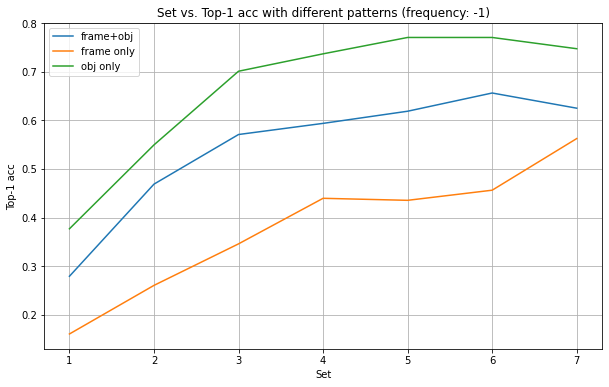

In [2]:
# -1
import matplotlib.pyplot as plt
import numpy as np
  
x = np.array([1, 2, 3, 4, 5, 6, 7])
y_0 = np.array([
0.2791666667,
0.46875,
0.5708333333,
0.59375,
0.61875,
0.65625,
0.625])
y_1 = np.array([
0.1604166667,
0.2604166667,
0.3458333333,
0.4395833333,
0.4354166667,
0.45625,
0.5625])
y_2 = np.array([
0.3768421053,
0.5494736842,
0.7010526316,
0.7368421053,
0.7705263158,
0.7705263158,
0.7473684211])
# first plot with X and Y data
# plt.subplot(num_rows, num_columns, i)
plt.figure(figsize=(10, 6))
plt.plot(x, y_0, label='frame+obj', linestyle="-")
plt.plot(x, y_1, label='frame only', linestyle="-")
plt.plot(x, y_2, label='obj only', linestyle="-")
  
plt.xlabel("Set")
plt.ylabel("Top-1 acc")
plt.title('Set vs. Top-1 acc with different patterns (frequency: -1)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import util
util.get_object_info_json()
path = join(data_path, scan, 'semseg.v2.json')
        num_class, obj_info = get_object_info_json(path, threshold)